<a href="https://colab.research.google.com/github/Sun-of-a-beach/British_Airways_Virtual_Internship/blob/main/Task_3_Predictive_modelling/British_Airways_Predictive_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Mounting Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Installing & Importing Libraries**

## **Imports**

In [ ]:
from argparse import Namespace
from collections import Counter
import json
import os
import re
import string
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm_notebook

# **Task 2**

---

## **Predictive modeling of customer bookings**

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### **Exploratory data analysis**

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/British Airways Data/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [ ]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


## **Comparing Sales from two different Sales channels i.e, Internet and Mobile.**

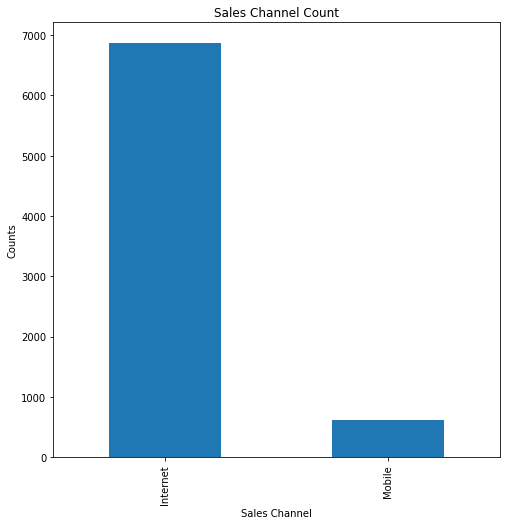

In [ ]:
## filtering the Data wherever booking is complete.
filtered_df =  df[df['booking_complete'] == 1]
# Counting the Sales Channels for each unique value.
sales_channels_counts = filtered_df['sales_channel'].value_counts()

# plotting into a Bar Graph for all the completed bookings
plt.figure(figsize=(8,8))
sales_channels_counts.plot(kind='bar')
plt.title('Sales Channel Count')
plt.xlabel('Sales Channel')
plt.ylabel('Counts')
plt.show()

We can clearly see that most of the Sales are from Internet users which maybe Desktop or laptop instead of mobile, more people like to do booking from their home or when comfortable.

In [ ]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7478 entries, 82 to 49987
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         7478 non-null   int64  
 1   sales_channel          7478 non-null   object 
 2   trip_type              7478 non-null   object 
 3   purchase_lead          7478 non-null   int64  
 4   length_of_stay         7478 non-null   int64  
 5   flight_hour            7478 non-null   int64  
 6   flight_day             7478 non-null   object 
 7   route                  7478 non-null   object 
 8   booking_origin         7478 non-null   object 
 9   wants_extra_baggage    7478 non-null   int64  
 10  wants_preferred_seat   7478 non-null   int64  
 11  wants_in_flight_meals  7478 non-null   int64  
 12  flight_duration        7478 non-null   float64
 13  booking_complete       7478 non-null   int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 876.3

## **Comparing Sales for different Trip types**

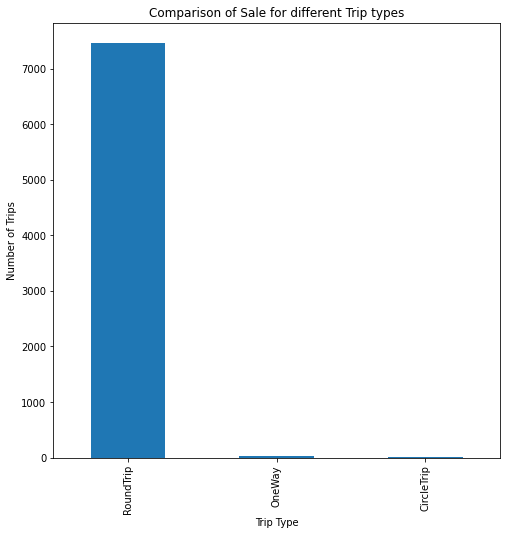

In [ ]:
df['trip_type'].unique()
trip_type_count = filtered_df['trip_type'].value_counts()
plt.figure(figsize = (8,8))
trip_type_count.plot(kind='bar')
plt.title('Comparison of Sale for different Trip types')
plt.xlabel('Trip Type')
plt.ylabel('Number of Trips')
plt.show()

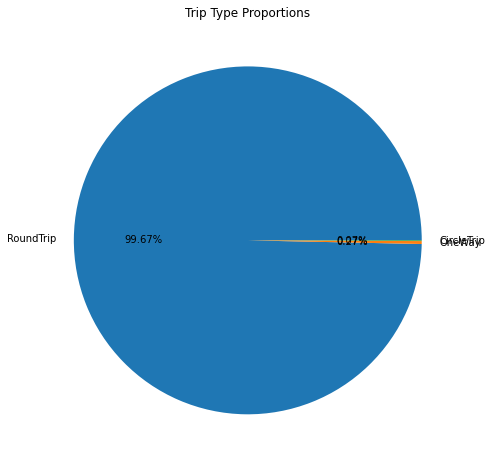

In [ ]:
plt.figure(figsize = (8,8))
# create a pie chart
plt.pie(trip_type_count, labels=trip_type_count.index, autopct='%1.2f%%')

# set plot title
plt.title('Trip Type Proportions')

# display the plot
plt.show()

In [ ]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


## **Comparing Sales from different countries**

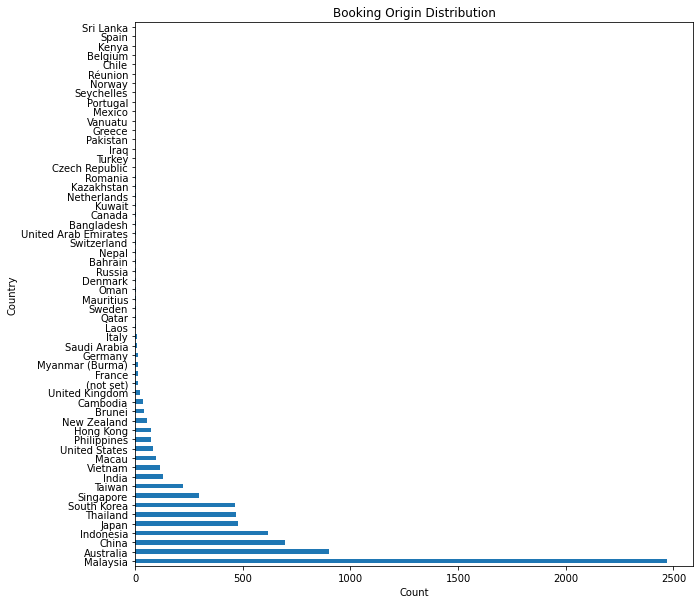

In [ ]:
booking_origin_counts = filtered_df['booking_origin'].value_counts()
plt.figure(figsize=(10,10))
# create a horizontal bar chart
booking_origin_counts.plot(kind='barh')

# set plot title and axis labels
plt.title('Booking Origin Distribution')
plt.xlabel('Count')
plt.ylabel('Country')

# display the plot
plt.show()

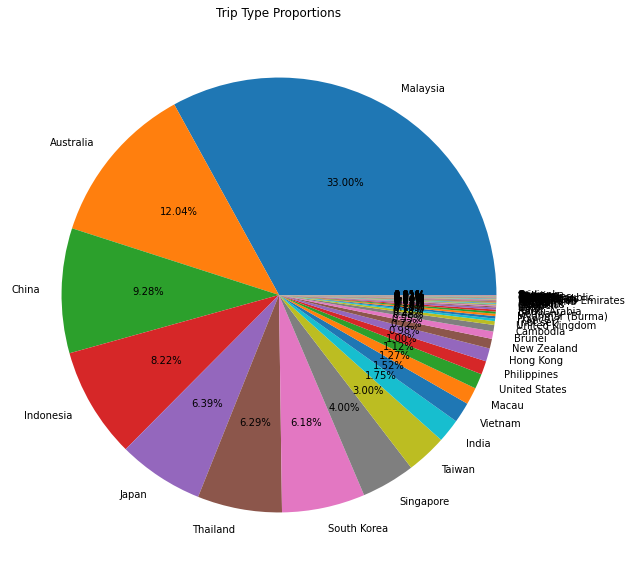

In [ ]:
plt.figure(figsize=(10,10))
plt.pie(booking_origin_counts, labels = booking_origin_counts.index, autopct='%.2f%%')
plt.title('Trip Type Proportions')
plt.show()

## **Making Two new columns from existing route column namely origin_airport and destination_airport.**

In [ ]:
df['route'] = df['route'].str.strip() # Trimming all the Whitespaces if any present.
## Extracting the first 3 letters for origin_airport column
df['origin_airport'] = df['route'].str[0:3]
## Extracting the last 3 letters for destination_airport column
df['destination_airport'] =  df['route'].str[-3:]

In [ ]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,origin_airport,destination_airport
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0,AKL,DEL
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0,AKL,DEL
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0,AKL,DEL
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0,AKL,DEL
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0,AKL,DEL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0,PER,PNH
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0,PER,PNH
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0,PER,PNH
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0,PER,PNH


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
 14  origin_airport         50000 non-null  object 
 15  de

# **Converting all the 0 , 1 categories to boolean for Tableau**
And saving the Dataframe as CSV for later use.

In [ ]:
'''
# Convert integer columns to boolean columns
df['wants_extra_baggage'] = df['wants_extra_baggage'].astype(bool)
df['wants_preferred_seat'] = df['wants_preferred_seat'].astype(bool)
df['wants_in_flight_meals'] = df['wants_in_flight_meals'].astype(bool)
df['booking_complete'] = df['booking_complete'].astype(bool)

'''

"\n# Convert integer columns to boolean columns\ndf['wants_extra_baggage'] = df['wants_extra_baggage'].astype(bool)\ndf['wants_preferred_seat'] = df['wants_preferred_seat'].astype(bool)\ndf['wants_in_flight_meals'] = df['wants_in_flight_meals'].astype(bool)\ndf['booking_complete'] = df['booking_complete'].astype(bool)\n\n"

In [ ]:
'''
#Saving Dataframe to CSV
df.to_csv('Customer_booking_British_Airways_Tableau.csv')
!cp Customer_booking_British_Airways_Tableau.csv "drive/My Drive/"

'''

'\n#Saving Dataframe to CSV \ndf.to_csv(\'Customer_booking_British_Airways_Tableau.csv\')\n!cp Customer_booking_British_Airways_Tableau.csv "drive/My Drive/"\n\n'

In [ ]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,origin_airport,destination_airport
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0,AKL,DEL
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0,AKL,DEL
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0,AKL,DEL
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0,AKL,DEL
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0,AKL,DEL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0,PER,PNH
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0,PER,PNH
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0,PER,PNH
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0,PER,PNH


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
 14  origin_airport         50000 non-null  object 
 15  de

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking
- `origin_airport` = origin airport code
-`destination_airport`= destination airport code

Before we compute any statistics on the data, lets do any necessary data conversion

In [ ]:
df['booking_origin'].value_counts()


Australia               17872
Malaysia                 7174
South Korea              4559
Japan                    3885
China                    3387
                        ...  
Panama                      1
Tonga                       1
Tanzania                    1
Bulgaria                    1
Svalbard & Jan Mayen        1
Name: booking_origin, Length: 104, dtype: int64

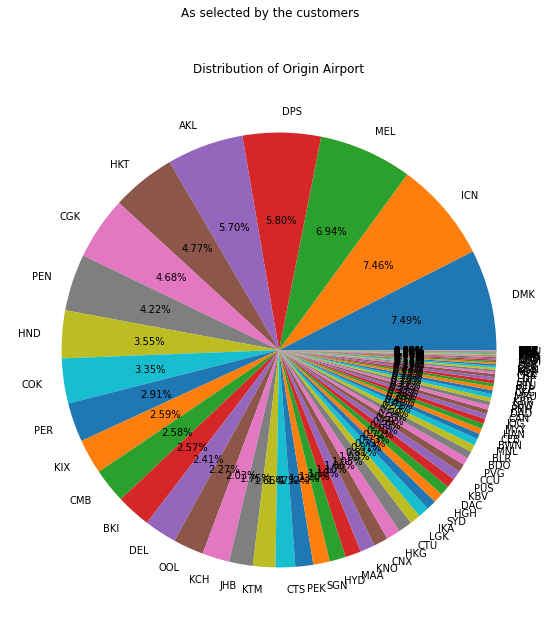

In [ ]:
### Plotting the Origin Airport Distribution As selected by the customers
origin_airpport_count = df['origin_airport'].value_counts()
plt.figure(figsize=(10,10))
plt.pie(origin_airpport_count, labels = origin_airpport_count.index, autopct = '%.2f%%')
plt.title('Distribution of Origin Airport')
plt.suptitle('As selected by the customers')
plt.show()

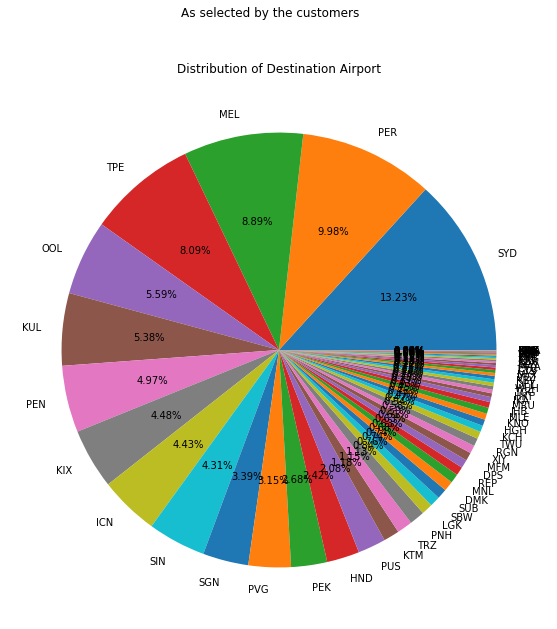

In [ ]:
### Plotting the Destination Airport Distribution As selected by the customers
destination_airport_count = df['destination_airport'].value_counts()
plt.figure(figsize=(10,10))
plt.pie(destination_airport_count, labels = destination_airport_count.index, autopct = '%.2f%%')
plt.title('Distribution of Destination Airport')
plt.suptitle('As selected by the customers')
plt.show()

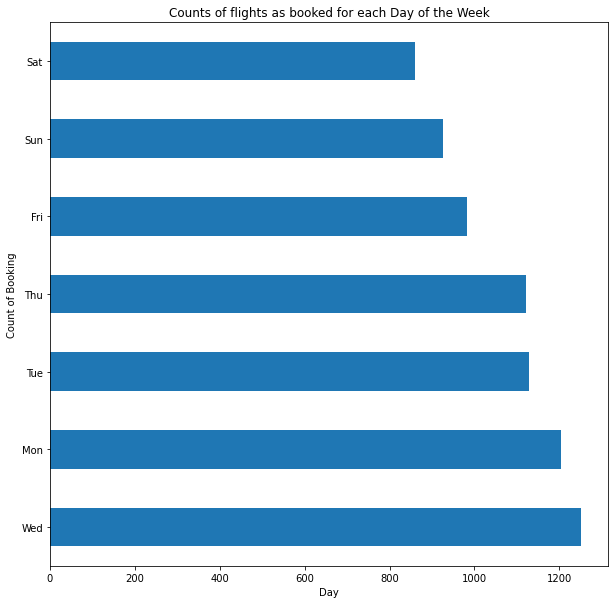

In [ ]:
flight_day_count = filtered_df["flight_day"].value_counts()
plt.figure(figsize=(10,10))
flight_day_count.plot(kind = 'barh')
plt.title('Counts of flights as booked for each Day of the Week')
plt.xlabel('Day')
plt.ylabel('Count of Booking')
plt.show()

In [ ]:
'''mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)'''

'mapping = {\n    "Mon": 1,\n    "Tue": 2,\n    "Wed": 3,\n    "Thu": 4,\n    "Fri": 5,\n    "Sat": 6,\n    "Sun": 7,\n}\n\ndf["flight_day"] = df["flight_day"].map(mapping)'

Droppig the route column as we already created two new features from it and we don't need to repeat ourselves.

In [ ]:
df =  df.drop('route', axis= 1)

In [ ]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,origin_airport,destination_airport
0,2,Internet,RoundTrip,262,19,7,Sat,New Zealand,1,0,0,5.52,0,AKL,DEL
1,1,Internet,RoundTrip,112,20,3,Sat,New Zealand,0,0,0,5.52,0,AKL,DEL
2,2,Internet,RoundTrip,243,22,17,Wed,India,1,1,0,5.52,0,AKL,DEL
3,1,Internet,RoundTrip,96,31,4,Sat,New Zealand,0,0,1,5.52,0,AKL,DEL
4,2,Internet,RoundTrip,68,22,15,Wed,India,1,0,1,5.52,0,AKL,DEL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,Australia,1,0,1,5.62,0,PER,PNH
49996,1,Internet,RoundTrip,111,6,4,Sun,Australia,0,0,0,5.62,0,PER,PNH
49997,1,Internet,RoundTrip,24,6,22,Sat,Australia,0,0,1,5.62,0,PER,PNH
49998,1,Internet,RoundTrip,15,6,11,Mon,Australia,1,0,1,5.62,0,PER,PNH


In [ ]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

## **Outliers**
Let's look at some some box-plots to see if we have some outliers.

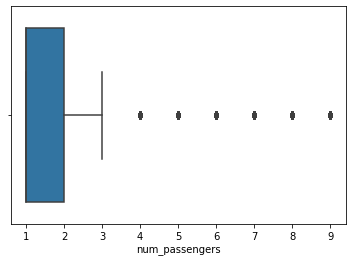

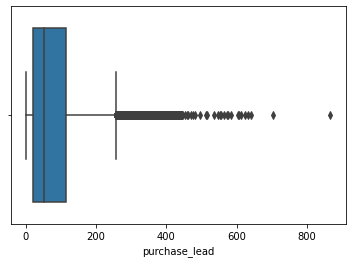

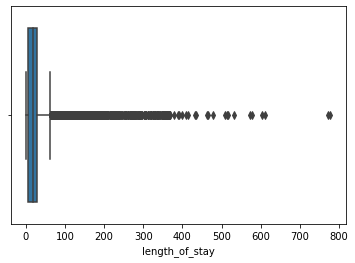

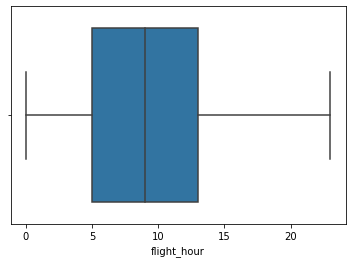

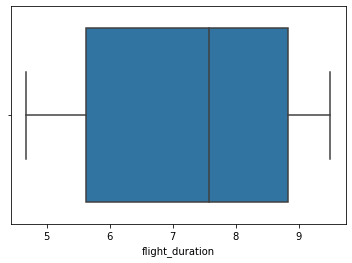

In [ ]:
import seaborn as sns # importing seaborn for plotting
## We can get a distribution such as box-plot to check if the data has any outliers for numeric columns
numeric_cols  =  ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_duration']
for col in numeric_cols:
  sns.boxplot(x = df[col])
  plt.show()


In [ ]:
df['num_passengers'].value_counts()

1    31352
2    12804
3     2941
4     1784
5      561
6      289
7      114
8       89
9       66
Name: num_passengers, dtype: int64

In [ ]:
q1_num_passengers = df['num_passengers'].quantile(0.25)
q3_num_passengers = df['num_passengers'].quantile(0.75)
iqr = q3_num_passengers - q1_num_passengers
upper_bound = q3_num_passengers + 1.5*iqr
lower_bound = q1_num_passengers - 1.5*iqr
outlier_num_passangers = df[ (df['num_passengers']>upper_bound) | (df['num_passengers']< lower_bound)]

In [ ]:
outlier_num_passangers

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,origin_airport,destination_airport
12,4,Internet,RoundTrip,265,24,19,Mon,New Zealand,1,0,1,5.52,0,AKL,DEL
37,6,Internet,RoundTrip,20,22,3,Fri,South Korea,1,1,1,6.62,0,AKL,ICN
61,4,Internet,RoundTrip,128,21,9,Mon,New Zealand,1,1,0,6.62,0,AKL,ICN
63,4,Internet,RoundTrip,311,27,6,Sat,New Zealand,0,1,0,6.62,0,AKL,ICN
118,6,Internet,RoundTrip,172,28,0,Sat,New Zealand,0,0,1,8.83,0,AKL,KUL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49953,8,Internet,RoundTrip,328,6,17,Sat,Malaysia,1,1,1,4.67,1,PEN,TPE
49958,4,Mobile,RoundTrip,108,6,16,Mon,Malaysia,1,0,1,4.67,0,PEN,TPE
49960,5,Internet,RoundTrip,102,6,15,Thu,Malaysia,1,0,0,4.67,0,PEN,TPE
49976,4,Internet,RoundTrip,151,6,15,Tue,Malaysia,1,0,0,4.67,0,PEN,TPE


## **Encoding our Features**
We are going to use get_dummies from sklearn on all the categorical features

In [ ]:
df_encoded = pd.get_dummies(df , columns = ['sales_channel', 'trip_type', 'flight_day', 'booking_origin', 'origin_airport', 'destination_airport'], drop_first = True)


In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 268 entries, num_passengers to destination_airport_XIY
dtypes: float64(1), int64(8), uint8(259)
memory usage: 15.8 MB


In [ ]:
df_encoded

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Mobile,...,destination_airport_TGG,destination_airport_TPE,destination_airport_TRZ,destination_airport_TWU,destination_airport_URT,destination_airport_UTP,destination_airport_VTE,destination_airport_VTZ,destination_airport_WUH,destination_airport_XIY
0,2,262,19,7,1,0,0,5.52,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,112,20,3,0,0,0,5.52,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,243,22,17,1,1,0,5.52,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,96,31,4,0,0,1,5.52,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,68,22,15,1,0,1,5.52,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,27,6,9,1,0,1,5.62,0,0,...,0,0,0,0,0,0,0,0,0,0
49996,1,111,6,4,0,0,0,5.62,0,0,...,0,0,0,0,0,0,0,0,0,0
49997,1,24,6,22,0,0,1,5.62,0,0,...,0,0,0,0,0,0,0,0,0,0
49998,1,15,6,11,1,0,1,5.62,0,0,...,0,0,0,0,0,0,0,0,0,0


In this model we are not going to remove any outliers as features such as  num_passengers people often book as family or big groups of some events also book together. So removing might be loss of data.

## **Splitting the data into Training and Testing Dataset**
using the train_test_split from Sklearn

In [ ]:
df_encoded

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Mobile,...,destination_airport_TGG,destination_airport_TPE,destination_airport_TRZ,destination_airport_TWU,destination_airport_URT,destination_airport_UTP,destination_airport_VTE,destination_airport_VTZ,destination_airport_WUH,destination_airport_XIY
0,2,262,19,7,1,0,0,5.52,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,112,20,3,0,0,0,5.52,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,243,22,17,1,1,0,5.52,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,96,31,4,0,0,1,5.52,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,68,22,15,1,0,1,5.52,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,27,6,9,1,0,1,5.62,0,0,...,0,0,0,0,0,0,0,0,0,0
49996,1,111,6,4,0,0,0,5.62,0,0,...,0,0,0,0,0,0,0,0,0,0
49997,1,24,6,22,0,0,1,5.62,0,0,...,0,0,0,0,0,0,0,0,0,0
49998,1,15,6,11,1,0,1,5.62,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and test dataset by dropping the booking_complete column as that is our y.
X_train , X_test , y_train , y_test = train_test_split(df_encoded.drop('booking_complete', axis = 1), df_encoded['booking_complete'],test_size = 0.2, random_state = 42)

In [ ]:
X_train

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,sales_channel_Mobile,trip_type_OneWay,...,destination_airport_TGG,destination_airport_TPE,destination_airport_TRZ,destination_airport_TWU,destination_airport_URT,destination_airport_UTP,destination_airport_VTE,destination_airport_VTZ,destination_airport_WUH,destination_airport_XIY
39087,1,15,5,13,0,0,1,6.62,1,0,...,0,0,0,0,0,0,0,0,0,0
30893,1,298,4,9,1,0,0,8.83,0,0,...,0,0,0,0,0,0,0,0,0,0
45278,2,200,6,5,1,0,0,6.62,0,0,...,0,0,0,0,0,0,0,0,0,0
16398,1,79,21,11,1,0,0,8.58,0,0,...,0,0,0,0,0,0,0,0,0,0
13653,1,105,20,6,1,0,1,6.62,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,1,20,91,11,1,0,1,8.58,0,0,...,0,0,0,0,0,0,0,0,0,0
44732,1,65,6,18,1,1,1,7.42,0,0,...,0,0,0,0,0,0,0,0,0,0
38158,2,107,5,6,1,0,0,7.57,1,0,...,0,0,0,0,0,0,0,0,0,0
860,4,232,19,8,0,0,0,8.83,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_train

39087    0
30893    1
45278    0
16398    0
13653    0
        ..
11284    0
44732    0
38158    1
860      0
15795    0
Name: booking_complete, Length: 40000, dtype: int64

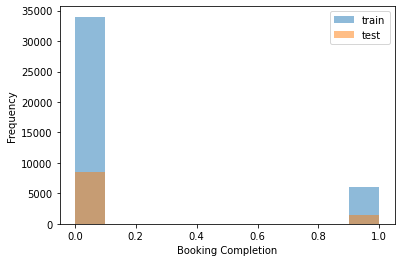

In [ ]:

## Visulaizing our test data
## Plotting the distrubution of Target variables for train and test sets
fig , ax = plt.subplots()
ax.hist(y_train, alpha = 0.5, label = 'train')
ax.hist(y_test, alpha = 0.5 , label = 'test')
ax.set_xlabel('Booking Completion')
ax.set_ylabel('Frequency')
ax.legend(loc = 'best')
plt.show()


## **Training our model**
Using Random-forest as our alogorithm because we have to predict a binary classification and our model could have biases due to specific countries having more users using as we can see from the booking_origin category.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
## Let's say this is our baseline model which is the default RandomForest classifier with a random seed. We are going to modify from here.
rfc = RandomForestClassifier(random_state = 42)
rfc.fit(X_train, y_train)
print('Accuracy on train set :',rfc.score(X_train, y_train))


Accuracy on train set : 0.999875


In [ ]:
# get the predictions on the test data
y_pred = rfc.predict(X_test)
# calculate accuracy score
print('Accuracy on test set:', rfc.score(X_test, y_test))
print('AUC score: ',roc_auc_score(y_test,y_pred))

Accuracy on test set: 0.8557
AUC score:  0.5599559066108362


In [ ]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

## **Using Hyperparameter Tuning and experimenting with different models**
1. When early stoppig is used max_depth = 4

In [ ]:
from sklearn.metrics import roc_auc_score
rfc_early_stopped = RandomForestClassifier(random_state = 42, max_depth = 4)
rfc_early_stopped.fit(X_train, y_train)
print('Accuracy on train set :',rfc_early_stopped.score(X_train, y_train))
# calculate accuracy score
print('Accuracy on test set:', rfc_early_stopped.score(X_test, y_test))
# Predicting and calculating AUC
y_pred_early_stopped = rfc_early_stopped.predict(X_test)
print('AUC score: ',roc_auc_score(y_test,y_pred_early_stopped))

Accuracy on train set : 0.85005
Accuracy on test set: 0.852
AUC score:  0.5


The AUC score here indicates this model is basically useless as it always has a chance of predicting 50% of the time correct prediction. Which is as good as any regular coin toss. There is no point in using this further.

2. When max_features = "sqrt"

In [ ]:
rfc_max_features = RandomForestClassifier(random_state = 42, max_features = "sqrt")
rfc_max_features.fit(X_train, y_train)
print('Accuracy on train set :',rfc_max_features.score(X_train, y_train))
# calculate accuracy score
print('Accuracy on test set:', rfc_max_features.score(X_test, y_test))

Accuracy on train set : 0.999875
Accuracy on test set: 0.8557


## **Evaluting our Models**
using Cross_Validation

In [ ]:
from sklearn.model_selection import cross_val_score
## First We cross validate our baseline model rfc which is just the default random forest model
scores_rfc =  cross_val_score(rfc , X_train ,y_train,cv=10, scoring='accuracy')
print(f"Accuracy mean : {scores_rfc.mean()} & Accuray std : {scores_rfc.std()}")

Accuracy mean : 0.849225 & Accuray std : 0.003595917824422572


In [ ]:
scores_rfc_max_features =  cross_val_score(rfc , X_train ,y_train,cv=10, scoring='accuracy')
print(f"Accuracy mean : {scores_rfc_max_features.mean()} & Accuray std : {scores_rfc_max_features.std()}")

Accuracy mean : 0.849225 & Accuray std : 0.003595917824422572


## **Plotting As a Confusion Matrix**

[0 1]


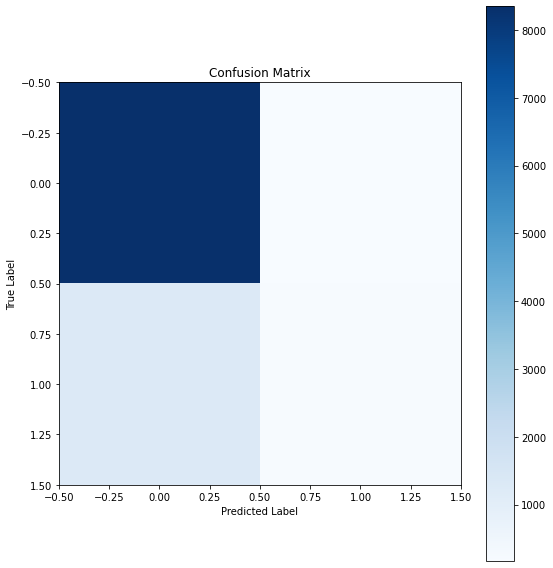

In [ ]:
from sklearn.metrics import confusion_matrix
## Plotting Confusion Matrix for our baseline model

# Generating a confusion Matrix
cm  =  confusion_matrix(y_test, y_pred)
# Visualize as plot
plt.figure(figsize=(8,8))
plt.imshow(cm, cmap = plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

classes = np.unique(np.concatenate((y_train, y_test), axis=0))
print(classes)
tick_marks = np.arange(len(classes))
plt.xticks()
plt.yticks()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

## **Feature Importance and Visualizing them**
we are goint to use the feature_importances_ attribute of your trained Random Forest Classifier (rfc) to get the importance of each feature. The higher the value, the more important the feature is in predicting the target variable.
Plotting only the top 10 features.

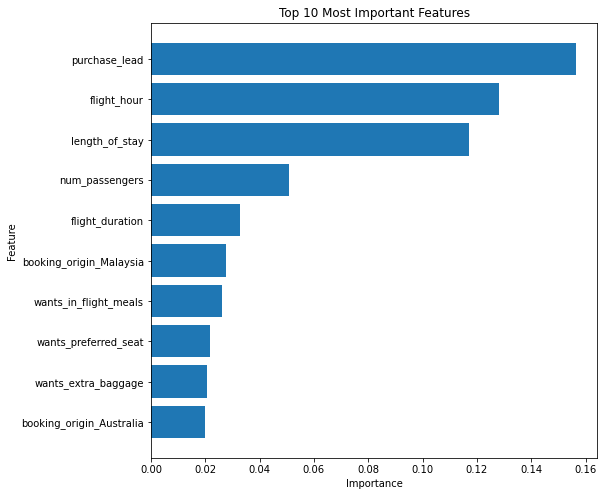

In [ ]:
importances =  rfc.feature_importances_ #  getting feature importance from the trained basline model
# create a feature importance dataframe
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': rfc.feature_importances_})

# sort the dataframe by importance score in descending order
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# display top 10 features
top_10 = feature_importance.head(10)[::-1]
plt.figure(figsize=(8,8))
plt.barh(top_10['Feature'], top_10['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Most Important Features')
plt.show()
